In [1]:
import geopandas
import pandas as pd
import glob
import datetime as dt
import re

c:\Users\dexmc\anaconda3\envs\geo\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
def read_data(type, city = None):
    csvfiles = glob.glob(f"data{'/'+city if city else ''}/data-{type}-*.geojson")

    dfs = []

    for file in csvfiles:
        df = geopandas.read_file(file)

        # Find the timestamp in the filename.
        df["timestamp"] = re.search("[0-9]{4}\-[0-9]{2}\-[0-9]{2}\_[0-9]{4}", file)[0]

        # Format the timestring so it can be converted to a timestamp.
        df["timestamp"] = df["timestamp"].apply(lambda x: x[:-2] + ':' + x[-2:])
        df["timestamp"] = df["timestamp"].str.replace("_", " ")

        # Convert to timestamp, then from UTC to EST (minus 4 hours).
        df["timestamp"] = pd.to_datetime(df["timestamp"]) - dt.timedelta(hours = 4)
        
        dfs.append(df)
        
    data = pd.concat(dfs)

    return data

## Shapes

In [3]:
shapes = read_data("shapes")

shapes

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,8.417532e+05,11061.622130,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
1,2899719,dd9d67f1-6333-497c-8ec4-77291f037d25,1,LAV-I-18195-1,7.826897e+05,10868.220674,"POLYGON ((-76.57129 45.54161, -76.57156 45.541...",2023-04-06 10:59:00
2,2899720,e7597d45-0678-44e8-a7ba-7a6ca514a342,1,LAV-I-18195-1,1.171973e+05,1353.738910,"POLYGON ((-76.66318 45.57150, -76.66401 45.572...",2023-04-06 10:59:00
3,2899721,5ce36fc5-405d-47c1-86e3-0a95478ac17f,1,LAV-I-18195-1,3.001864e+04,621.359927,"POLYGON ((-76.65784 45.60850, -76.65775 45.608...",2023-04-06 10:59:00
4,2899722,5e0a58a7-7948-4bc6-92f0-75593a203f9c,1,LAV-I-18195-1,2.998392e+04,621.000436,"POLYGON ((-76.65167 45.57708, -76.65159 45.577...",2023-04-06 10:59:00
...,...,...,...,...,...,...,...,...
3995,2946252,c1e093d9-3c6f-4dcb-a36b-5616f31f4818,1,NOR-I-18360-1,1.384052e+04,438.835502,"POLYGON ((-73.60076 45.57759, -73.60032 45.577...",2023-04-07 07:55:00
3996,2946253,338dd9a3-e040-4d59-b7a2-f47fb27c9acc,1,NOR-I-13924-1,2.034985e+06,13376.225898,"POLYGON ((-73.78391 45.49851, -73.78418 45.498...",2023-04-07 07:55:00
3997,2946254,39fe7751-d30b-43c5-adc2-45b0e6d25b94,1,NOR-I-18348-1,8.951432e+04,1223.624110,"POLYGON ((-73.60783 45.58043, -73.60757 45.580...",2023-04-07 07:55:00
3998,2946258,225066f7-49f7-42a7-ba28-3090292718ce,1,NOR-I-18375-1,2.093931e+04,566.553160,"POLYGON ((-73.80697 45.50612, -73.80684 45.505...",2023-04-07 07:55:00


In [4]:
shapes[shapes['OBJECTID'] == 2899718]

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:25:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:35:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:45:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:55:00
...,...,...,...,...,...,...,...,...
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-07 07:11:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-07 07:25:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-07 07:35:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-07 07:45:00


<AxesSubplot:xlabel='timestamp'>

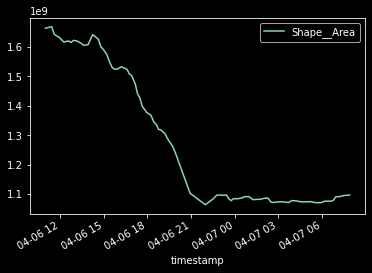

In [21]:
shapes.groupby("timestamp")["Shape__Area"].sum().to_frame().plot()

In [22]:
counts = shapes.pivot_table(index="timestamp", columns="panneMajeure", values="OBJECTID", aggfunc="count")
counts["sum"] = counts.sum(axis=1)

counts

panneMajeure,0,1,sum
timestamp,,,
2023-04-06 10:59:00,382,3618,4000
2023-04-06 11:25:00,373,3627,4000
2023-04-06 11:35:00,387,3613,4000
2023-04-06 11:45:00,394,3606,4000
2023-04-06 11:55:00,376,3624,4000
...,...,...,...
2023-04-07 07:11:00,243,3757,4000
2023-04-07 07:25:00,243,3757,4000
2023-04-07 07:35:00,209,3791,4000


## Points

In [6]:
points = read_data("points")

points

,OBJECTID,GlobalID,idInterruption,panneMajeure,geometry,timestamp
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324),2023-04-06 10:59:00
1,497657,8f9c9311-698c-40fb-8c79-80cb9761b7a5,LAV-I-18195-1,1,POINT (-76.57370 45.57492),2023-04-06 10:59:00
2,497658,00225fe0-aab7-48ae-a438-6e8e7b46924f,LAV-I-18157-1,1,POINT (-75.48215 45.57836),2023-04-06 10:59:00
3,497665,0834d766-4b2c-47fa-9008-c283ac59d0eb,LAV-I-18089-1,1,POINT (-75.45042 45.55672),2023-04-06 10:59:00
4,497667,44b8383c-04e6-4555-a4f1-28dd760120ce,LAV-I-18429-1,1,POINT (-74.72894 45.71589),2023-04-06 10:59:00
...,...,...,...,...,...,...
3527,514815,d421da62-0bfb-40d4-92f8-4da603507a9f,LAV-I-26009-1,1,POINT (-73.25336 46.15803),2023-04-07 07:55:00
3528,514816,11a1ee6f-d283-4120-9b8b-b4a1ca282c72,LAV-I-25981-1,1,POINT (-75.32555 45.75723),2023-04-07 07:55:00
3529,514817,07a48705-6e9a-4518-b0bd-2bd2734c9383,LAV-I-26011-1,1,POINT (-73.72132 45.60522),2023-04-07 07:55:00
3530,514819,da82f5cf-f8df-48fa-ae10-3c74c8b6f0d6,SEI-I-26964-1,1,POINT (-73.51122 45.49343),2023-04-07 07:55:00


In [12]:
counts = points.pivot_table(index="timestamp", columns="panneMajeure", values="OBJECTID", aggfunc="count")
counts["sum"] = counts.sum(axis=1)

counts

panneMajeure,0,1,sum
timestamp,,,
2023-04-06 10:59:00,278,2680,2958
2023-04-06 11:25:00,270,2714,2984
2023-04-06 11:35:00,274,2731,3005
2023-04-06 11:45:00,285,2739,3024
2023-04-06 11:55:00,279,2766,3045
...,...,...,...
2023-04-07 07:11:00,201,3349,3550
2023-04-07 07:25:00,189,3366,3555
2023-04-07 07:35:00,189,3360,3549


<AxesSubplot:xlabel='timestamp'>

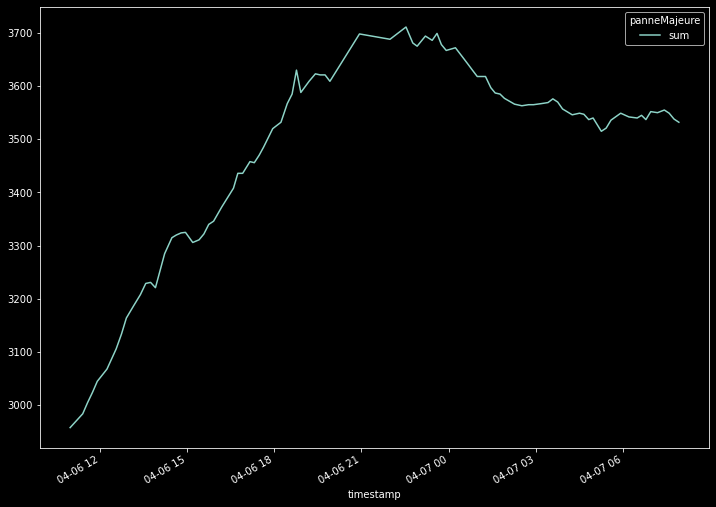

In [17]:
counts[["sum"]].plot(figsize=(12,9))

<AxesSubplot:>

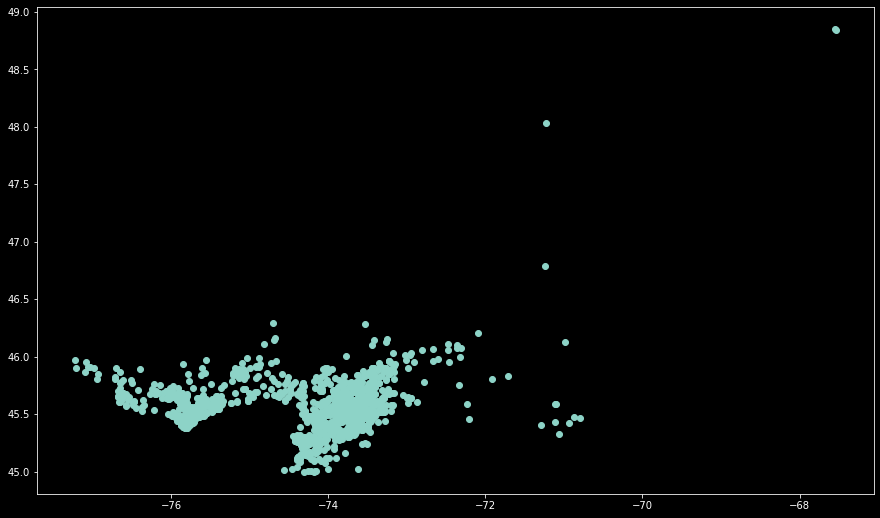

In [8]:
points.loc[points["timestamp"] == points["timestamp"].max(), :].plot(figsize=(15,15))

## Ottawa

In [9]:
ottaraw = read_data("shapes", "ottawa")

ottaraw.head(3)

,Name,tessellate,extrude,visibility,CUSTOMERS_OUT,EVENT_NUMBER,OFF_DATETIME,OUTAGE_AREA,ESTIMATED_RESTORE,RESTORE_DATETIME,...,NUM_CUST,XFMR_CUST,AREA_CUSTCOUNT,RUN_ID,OUTAGE_CUSTOMERS,CAUSE_CODE,DGROUP,DEVICE_HASH,geometry,timestamp
0,R00329314,-1,0,-1,,R00329314,2023-04-05T19:30:04,9,2023-04-06T12:00:00,,...,,,,3435772,1399,Undetermined,EAST,1df809c06fea86acdef246dc0dc0c1d3555fc67cba27ee...,"POLYGON Z ((-75.51727 45.29926 0.00000, -75.51...",2023-04-06 07:52:00
1,R00329314,-1,0,-1,,R00329314,2023-04-05T19:30:04,6,2023-04-06T12:00:00,,...,,,,3435772,1399,Undetermined,EAST,1df809c06fea86acdef246dc0dc0c1d3555fc67cba27ee...,"POLYGON Z ((-75.50290 45.30512 0.00000, -75.50...",2023-04-06 07:52:00
2,R00329314,-1,0,-1,,R00329314,2023-04-05T19:30:04,7,2023-04-06T12:00:00,,...,,,,3435772,1399,Undetermined,EAST,1df809c06fea86acdef246dc0dc0c1d3555fc67cba27ee...,"POLYGON Z ((-75.51013 45.30272 0.00000, -75.50...",2023-04-06 07:52:00


<AxesSubplot:>

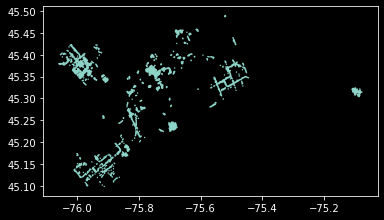

In [10]:
ottaraw.loc[ottaraw["timestamp"] == ottaraw["timestamp"].max(), :].plot()